In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn import manifold

%matplotlib inline


In [25]:
#データの読み込み
data = datasets.fetch_openml(
    'mnist_784',
    version=1,
    return_X_y=True
)
pixel_values, targets = data
targets = targets.astype(int)

In [26]:
#df→np.arrayに変換しないとreshapeができないので変換
pixel_values = pixel_values.to_numpy()
type(pixel_values)

numpy.ndarray

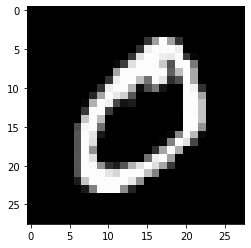

In [29]:
single_image = pixel_values[1, :].reshape(28,28)
plt.imshow(single_image, cmap='gray')

In [32]:
tsne = manifold.TSNE(n_components=2, random_state=42)
transformed_data = tsne.fit_transform(pixel_values[:3000, :])

C:\Users\Kakeru\miniconda3\envs\ml\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\Kakeru\miniconda3\envs\ml\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [38]:
tsne_df = pd.DataFrame(
    np.column_stack((transformed_data, targets[:3000])),
    columns=["x", "y", "targets"]
)
tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)

C:\Users\Kakeru\miniconda3\envs\ml\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


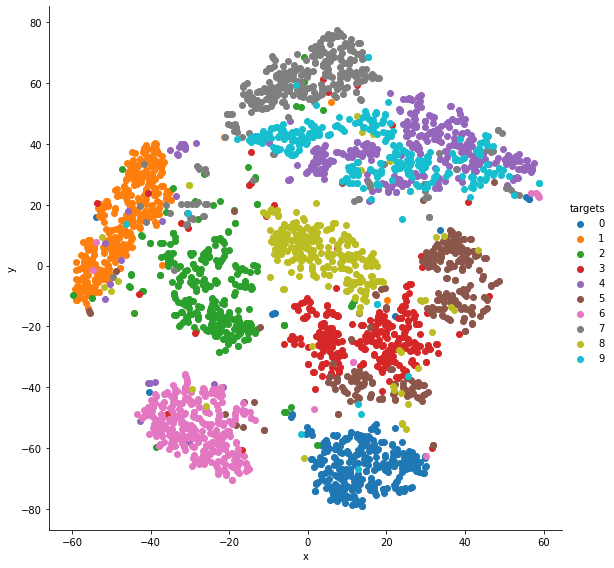

In [41]:
grid = sns.FacetGrid(tsne_df, hue="targets", size=8)
grid.map(plt.scatter, "x", "y").add_legend()